In [ ]:
!pip install tensorflow minisom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Correct file paths (FULL file path, not folder)
train_path = '/content/drive/MyDrive/Md. Borhan Uddin Khan /fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/Md. Borhan Uddin Khan /fashion-mnist_test.csv'

# Read CSVs directly
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train Data Columns:")
print(train_df.columns)

print("\nSample Train Data:")
print(train_df.head())


Train Data Columns:
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

Sample Train Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = train_df.drop('label', axis=1).values
y = train_df['label'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_scaled.shape[1]
encoding_dim = 64

input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0671
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0212
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0172
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0153
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0142
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0133
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0127
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0121
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0116
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0112
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0109
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0106
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0104
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0102
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


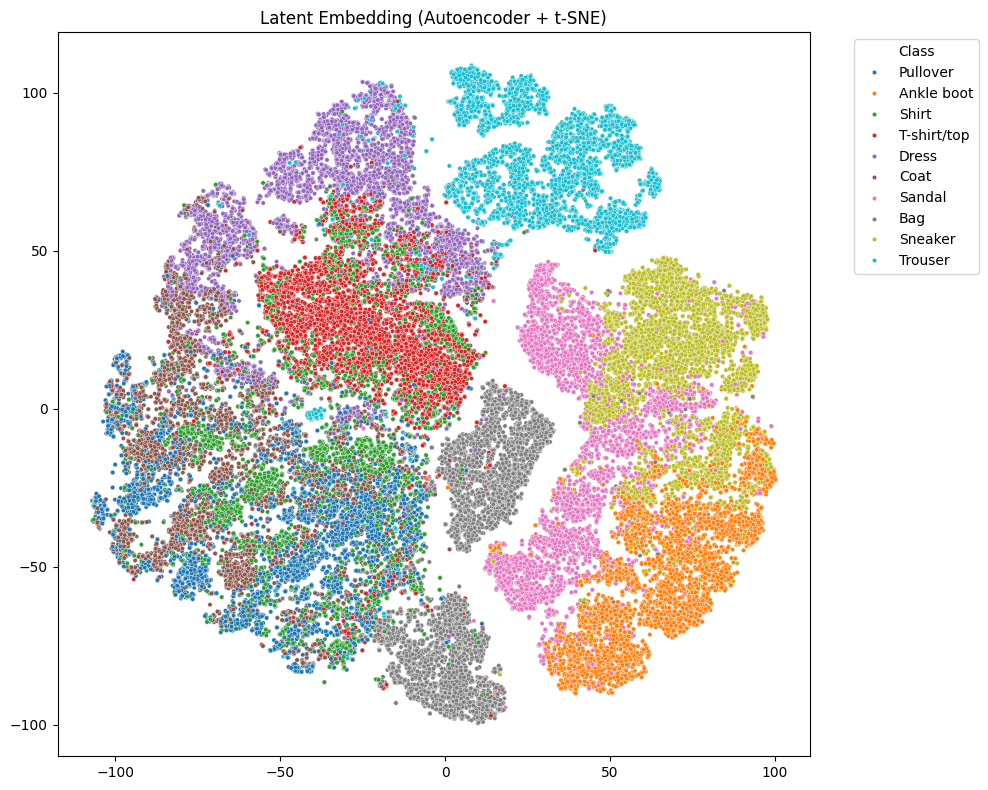

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Define label names
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Map numeric labels to string labels
y_named = [label_names[label] for label in y]

# Dimensionality reduction
X_encoded = encoder.predict(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_named, palette='tab10', s=10, legend='full')
plt.title("Latent Embedding (Autoencoder + t-SNE)")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional for better legend placement
plt.tight_layout()
plt.show()


In [ ]:
from minisom import MiniSom
import numpy as np

som_size = 30
som = MiniSom(x=som_size, y=som_size, input_len=encoding_dim, sigma=1.5, learning_rate=0.3)
som.random_weights_init(X_encoded)
som.train_random(X_encoded, 1000)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded)

In [ ]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print("Silhouette Score:", silhouette_score(X_encoded, kmeans_labels))
print("Homogeneity:", homogeneity_score(y, kmeans_labels))
print("Completeness:", completeness_score(y, kmeans_labels))
print("V-Measure:", v_measure_score(y, kmeans_labels))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y, kmeans_labels))
print("Adjusted Mutual Info (AMI):", adjusted_mutual_info_score(y, kmeans_labels))

Silhouette Score: 0.17680869
Homogeneity: 0.4747460613908835
Completeness: 0.48903053905528954
V-Measure: 0.48178244254712177
Adjusted Rand Index (ARI): 0.31459814474257514
Adjusted Mutual Info (AMI): 0.48162816858125895


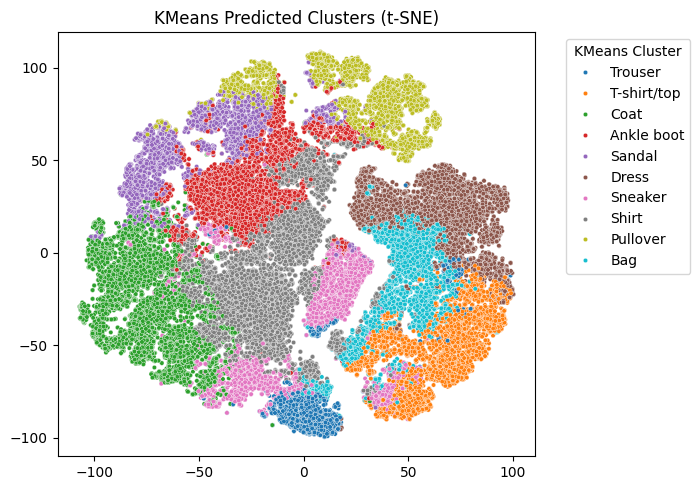

In [ ]:
kmeans_to_class = {
    0: 'Sneaker',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Bag',
    4: 'T-shirt/top',
    5: 'Dress',
    6: 'Sandal',
    7: 'Coat',
    8: 'Ankle boot',
    9: 'Shirt'
}

# Map cluster labels to class names
kmeans_named = [kmeans_to_class[label] for label in kmeans_labels]

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_named, palette='tab10', s=10, legend='full')
plt.title("KMeans Predicted Clusters (t-SNE)")
plt.legend(title='KMeans Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
